# Proyecto Final:
## Analítica predictiva y modelos de regresión en Python

### Parte 1: Análisis exploratorio de los datos

In [2]:
#Importación de líbrerias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
#Carga de datos
df_train = pd.read_csv('abalone_train.csv')
df_test = pd.read_csv('abalone_test.csv')

i. ¿Cuántos datos tenemos para nuestro análisis?

In [4]:
df_train.shape

(3342, 9)

In [5]:
df_train.columns

Index(['sexo', 'longitud', 'diametro', 'altura', 'peso_entero',
       'peso_sin_cascara', 'peso_visceras', 'peso_cascara', 'edad'],
      dtype='object')

In [6]:
df_train.head(5)

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
0,M,0.620,0.490,0.155,1.1000,0.5050,0.2475,0.3100,9
1,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,9
2,M,0.600,0.475,0.175,1.1100,0.5105,0.2560,0.2850,9
3,I,0.340,0.255,0.075,0.1800,0.0745,0.0400,0.0525,6
4,F,0.670,0.505,0.205,1.3645,0.6075,0.3025,0.3530,9


ii. Encontrar estadísticas descriptivas de todas las variables de
la base de datos. Entre ellas, deben estar: media, desviación
estándar, mínimo, máximo, percentiles 25, 50 y 75.

In [7]:
df_train.describe()

,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
count,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,0.522362,0.406858,0.139461,0.823557,0.355899,0.179492,0.238495,10.040694
std,0.120648,0.099741,0.042764,0.491525,0.221827,0.109655,0.141137,3.335768
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.092500,0.127875,8.000000
50%,0.540000,0.425000,0.140000,0.795750,0.332000,0.169250,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.145000,0.497000,0.249875,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df_train.sort_values('longitud')

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
482,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
2330,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
184,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
1335,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
700,I,0.135,0.130,0.040,0.0290,0.0125,0.0065,0.0080,4
...,...,...,...,...,...,...,...,...,...
2644,M,0.775,0.570,0.220,2.0320,0.7350,0.4755,0.6585,17
1959,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12
1615,F,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,11
2780,F,0.800,0.630,0.195,2.5260,0.9330,0.5900,0.6200,23


In [8]:
df_train.groupby(['sexo']).mean()

,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
sexo,,,,,,,,
F,0.576098,0.452322,0.157701,1.033271,0.438700,0.227446,0.299690,11.272897
I,0.424986,0.324427,0.107377,0.424676,0.188345,0.090859,0.126053,7.881617
M,0.557786,0.436865,0.150669,0.977689,0.425236,0.212564,0.280139,10.790754


In [9]:
df_train.groupby(['sexo']).agg({'altura': 'mean', 'peso_entero': 'max', 'edad': 'mean'})

,altura,peso_entero,edad
sexo,,,
F,0.157701,2.6570,11.272897
I,0.107377,1.7860,7.881617
M,0.150669,2.8255,10.790754


## Gráficos
### Gráficos de dispersión

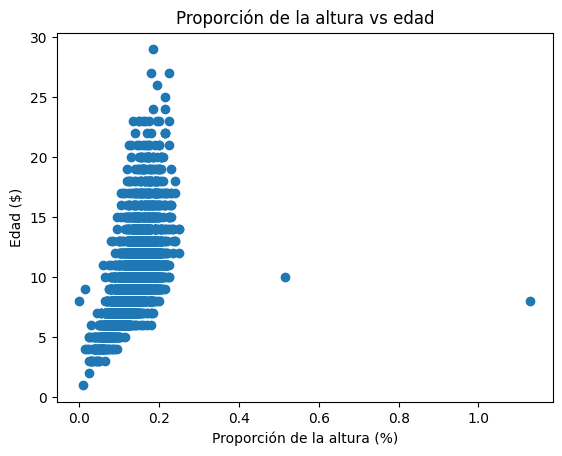

In [8]:
plt.scatter(df_train['altura'], df_train['edad'])
plt.title("Proporción de la altura vs edad")
plt.xlabel("Proporción de la altura (%)")
plt.ylabel("Edad ($)")
plt.show()

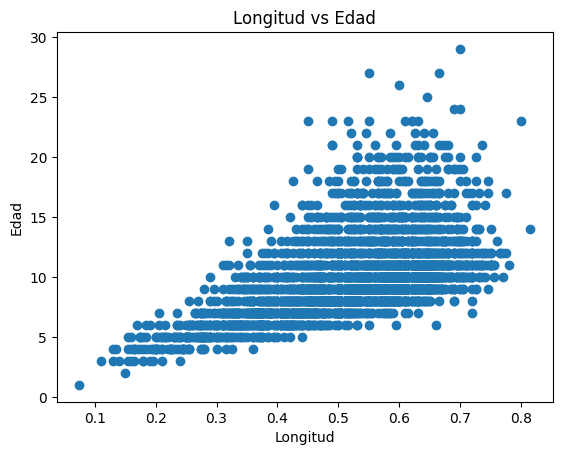

In [9]:
plt.scatter(df_train['longitud'], df_train['edad'])
plt.title("Longitud vs Edad")
plt.xlabel("Longitud")
plt.ylabel("Edad")
plt.show()

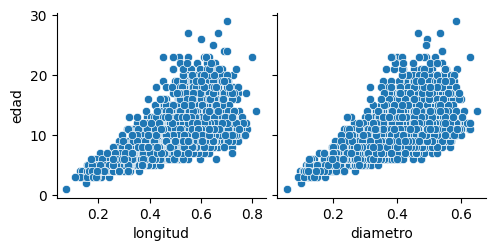

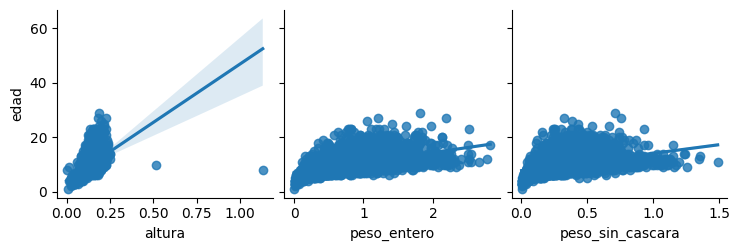

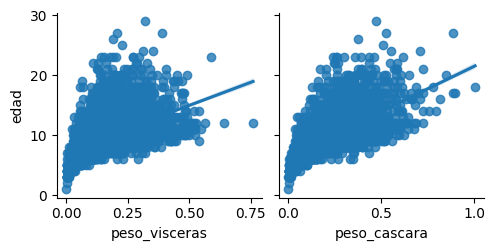

In [12]:
sns.pairplot(df_train, x_vars=['longitud', 'diametro'], y_vars=['edad'])
sns.pairplot(df_train, x_vars=['altura', 'peso_entero','peso_sin_cascara'], y_vars=['edad'], kind="reg")
sns.pairplot(df_train, x_vars=['peso_visceras', 'peso_cascara'], y_vars=['edad'], kind="reg")

C:\Users\n_sar\AppData\Local\Temp\ipykernel_16576\1376617749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr())


<AxesSubplot: >

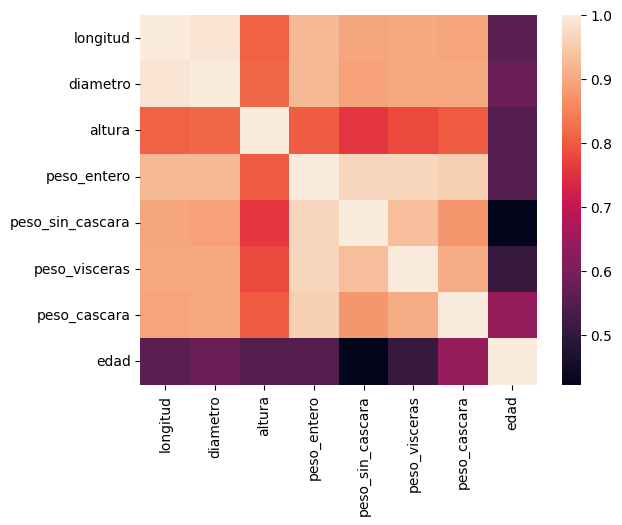

In [18]:
sns.heatmap(df_train.corr())

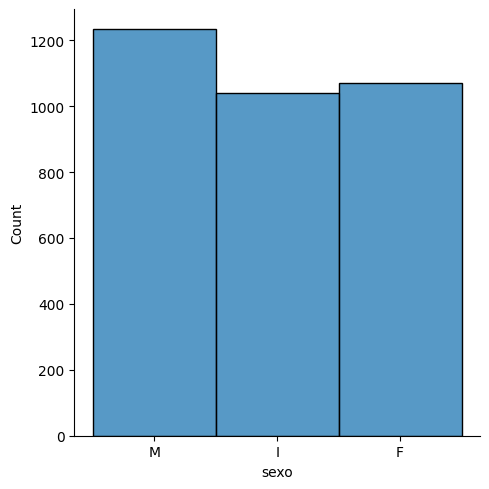

In [19]:
sns.displot(df_train, x="sexo")

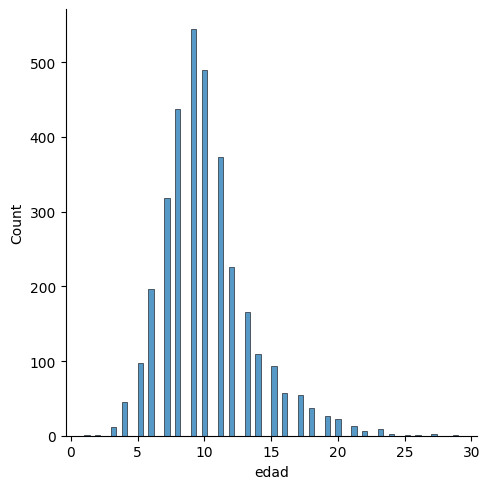

In [20]:
sns.displot(df_train, x="edad")

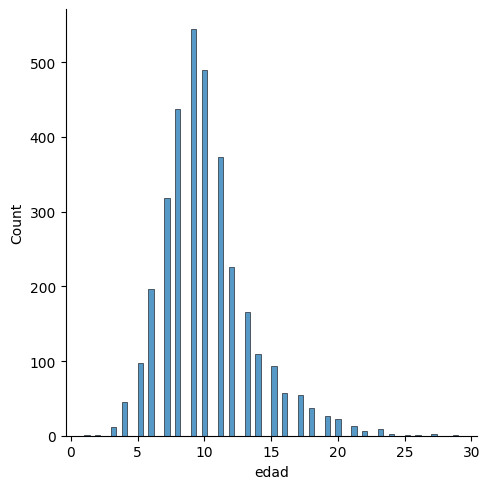

In [21]:
ax = sns.displot(df_train, x="edad", legend=False)

## Diagramas de cajas y bigotes

Text(0, 0.5, 'Sexo')

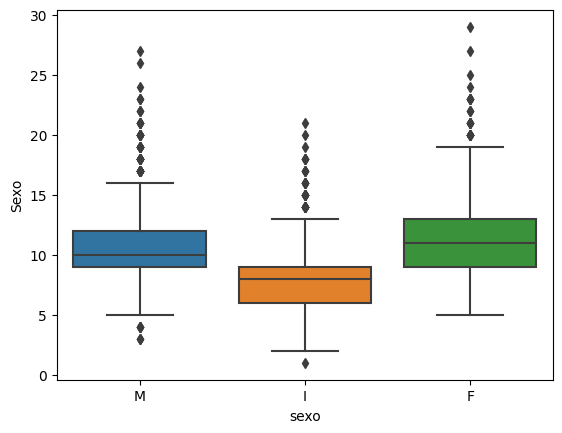

In [22]:
ax = sns.boxplot(x = df_train['sexo'], y = df_train['edad'])
ax.set_ylabel('Edad')
ax.set_ylabel('Sexo')

<AxesSubplot: xlabel='longitud', ylabel='edad'>

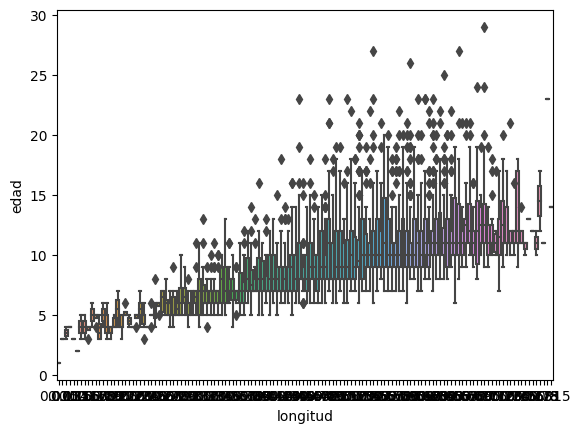

In [23]:
sns.boxplot(x = df_train['longitud'], y = df_train['edad'])